In [105]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
import helper.svm as svm

import numpy as np
import pandas as pd
import sklearn.svm

In [106]:
data = svm.load_data('ex6data1.mat')
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# visualize data
pay attention to the edge case at the left hand side

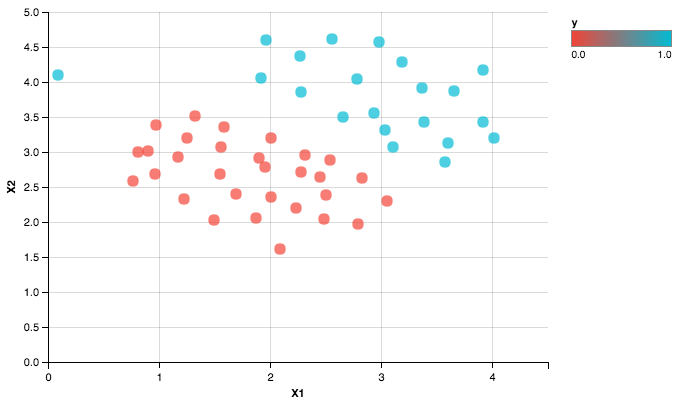

In [107]:
altair.Chart(data).mark_circle(size=100).encode(
    x='X1',
    y='X2',
    color=altair.Color('y', scale=altair.Scale(range=["#f44336", "#00BCD4"])))

# try $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [108]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

In [109]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

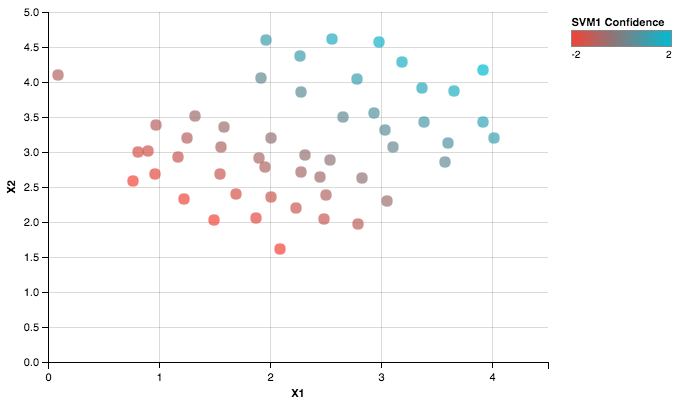

In [110]:
altair.Chart(data).mark_circle(size=100).encode(
    x='X1',
    y='X2',
    color=altair.Color('SVM1 Confidence', scale=altair.Scale(range=["#f44336", "#00BCD4"])))

# try $C=100$
with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [111]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

1.0

In [112]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

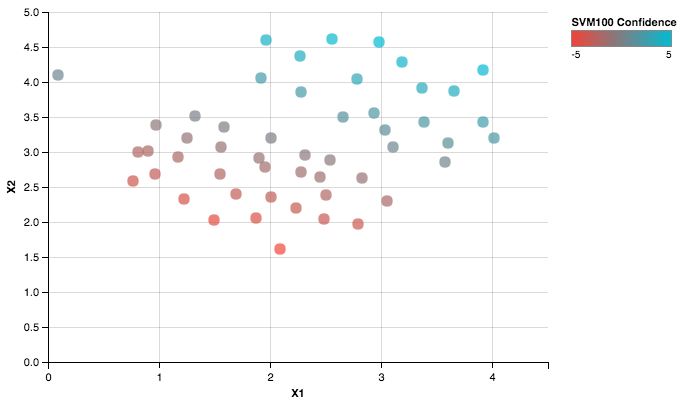

In [113]:
altair.Chart(data).mark_circle(size=100).encode(
    x='X1',
    y='X2',
    color=altair.Color('SVM100 Confidence', scale=altair.Scale(range=["#f44336", "#00BCD4"])))